In [2]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

# Read model (model of Escherichia coli)
model = read_sbml_model('model_atocopherol.xml')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Yield

In [2]:
model.objective = model.reactions.TOCOPHOM1
avite_production = model.optimize().objective_value
theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 1.2228500311138846
max. theoretical yield [mmol-put / mmol-glc]: 0.12228500311138846


In [3]:
with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    avite_production = model.optimize().objective_value
    theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
    print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
    print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 0.8769972144269683
max. theoretical yield [mmol-put / mmol-glc]: 0.08769972144269683


# Phenotypic phase planes
## Aerobic conditions

In [4]:
# phenotypic phase planes analysis
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

<AxesSubplot:title={'center':'alpha-tocopherol production as a function of oxygen exchange reaction'}, xlabel='EX_o2_e'>

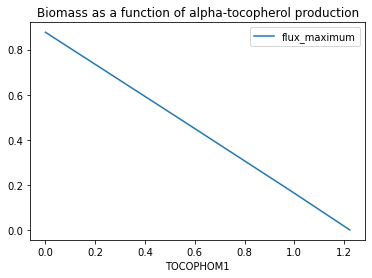

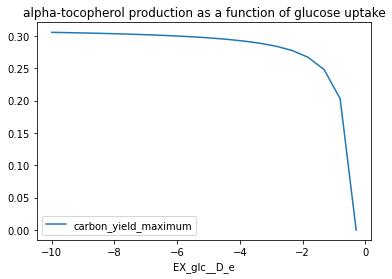

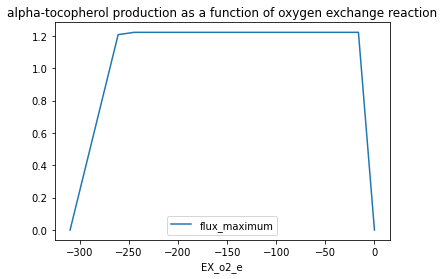

In [5]:

ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.TOCOPHOM1],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.TOCOPHOM1)
ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.TOCOPHOM1)

ppp_BIOMASS.plot(x='TOCOPHOM1', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol production as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction')

In [33]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-244.73684210530027

negative flux in the O2 exchange means aerobic growth (?)

## Anaerobic conditions

<AxesSubplot:title={'center':'alpha-tocopherol production as a function of oxygen exchange reaction'}, xlabel='EX_o2_e'>

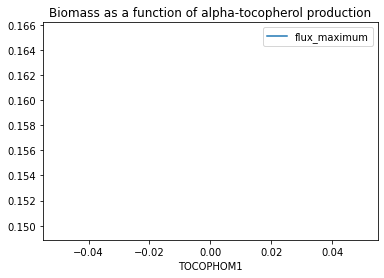

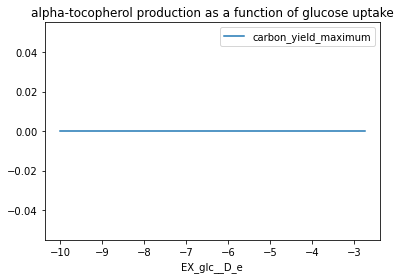

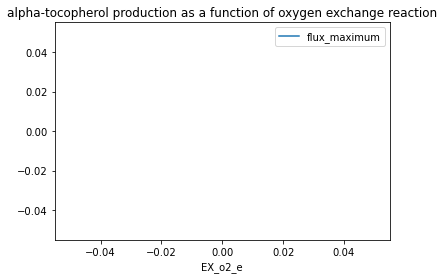

In [7]:
medium = model.medium
with model:
    medium['EX_o2_e'] = 0
    model.medium = medium
    ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.TOCOPHOM1],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.TOCOPHOM1)
    ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.TOCOPHOM1)

ppp_BIOMASS.plot(x='TOCOPHOM1', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol production as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction')
